In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_digits

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import roc_auc_score

# Загружаем набор рукописных цифр

In [8]:
digits = load_digits()

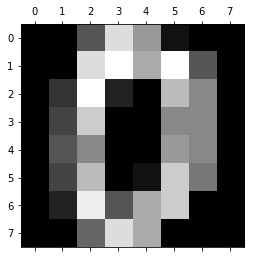

In [8]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

# Для начала научимся классифицировать 0 и 1

In [9]:
ones = digits.data[np.where(digits.target==1)[0]]

In [13]:
zeros = digits.data[np.where(digits.target==0)[0]]

(178, 64)

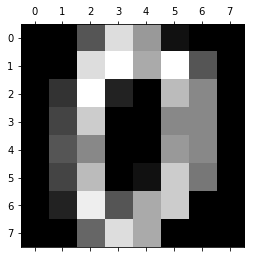

In [14]:
plt.matshow(zeros[0].reshape((8,8)))
plt.gray()
plt.show()

In [17]:
data_set = np.concatenate([ones,zeros])

In [18]:
target = np.concatenate([np.ones((ones.shape[0],1)),np.zeros((zeros.shape[0],1))])[:,0].T

In [19]:
ids = np.arange(target.shape[0])

In [20]:
np.random.shuffle(ids)

In [21]:
data_set = data_set[ids]
target = target[ids]

### разделяем набор данных на train и test

In [32]:
train_data_set, test_data_set, train_target, test_target = train_test_split(
    data_set, target, test_size=0.33, random_state=42)

# Создаём MLP

In [33]:
clf = MLPClassifier(solver='sgd', activation='logistic', \
                    alpha=0.001, hidden_layer_sizes=(32, 10))

Обучаем модель

In [34]:
clf.fit(train_data_set, train_target)

/home/solo/Documents/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Проверяем результат

In [36]:
pred = clf.predict_proba(test_data_set)

In [41]:
pred.shape

(594, 10)

In [27]:
target.shape

(360,)

In [28]:
roc_auc_score(y_score=pred[:,1], y_true=test_target)

1.0

# Задание: проверить работу сети для большего числа классов

In [30]:
target = np.concatenate([np.ones((ones.shape[0],1)),np.zeros((zeros.shape[0],1))])[:,0].T
print(target.shape[0])
print(target)

360
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [53]:
zeros = digits.data[np.where(digits.target==0)[0]]
print(zeros.shape)

(178, 64)


In [55]:
ones = digits.data[np.where(digits.target==1)[0]]
print(ones.shape)

(182, 64)
